In [1]:
import numpy as np
import copy
from IPython.display import HTML
from matplotlib import pyplot as plt, colors
import dill

import SimPEG as simpeg
from SimPEG.EM import NSEM

import sys
sys.path.append("../../../../pymatsolver/")
from pymatsolver import PardisoSolver
sys.path.append("../../../../../Dropbox/PhD_UBC/telluricpy/")
import telluricpy


# Set some matplotlib settings
%matplotlib notebook

In [2]:
mtData = dill.load(open('vertical_contact_mtData_1e2_1e1.pklb','rb'))
FmtSer = dill.load(open('vertical_contact_Fields.pklb','rb'))

<IPython.core.display.Javascript object>


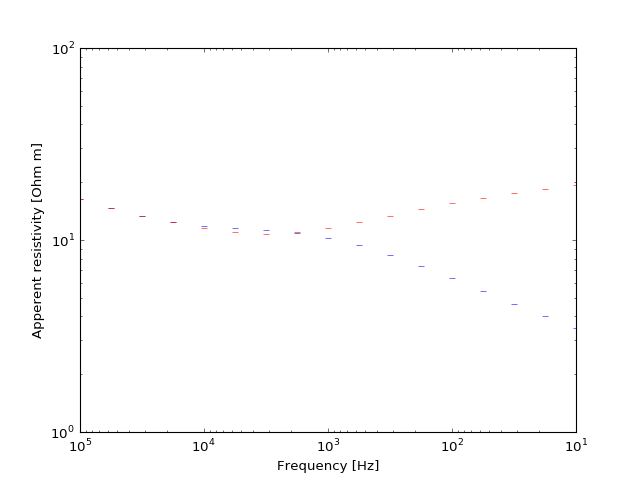

In [3]:
mtData.plot_app_res(np.array([55.,0.]))

<IPython.core.display.Javascript object>


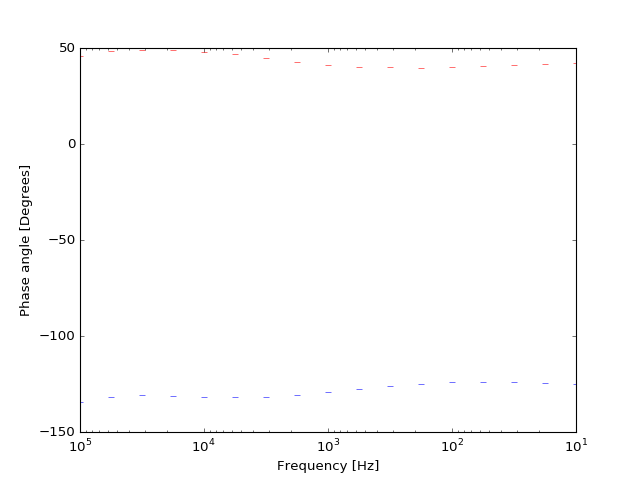

In [4]:
mtData.plot_app_phs(np.array([55.,0.]))

<IPython.core.display.Javascript object>


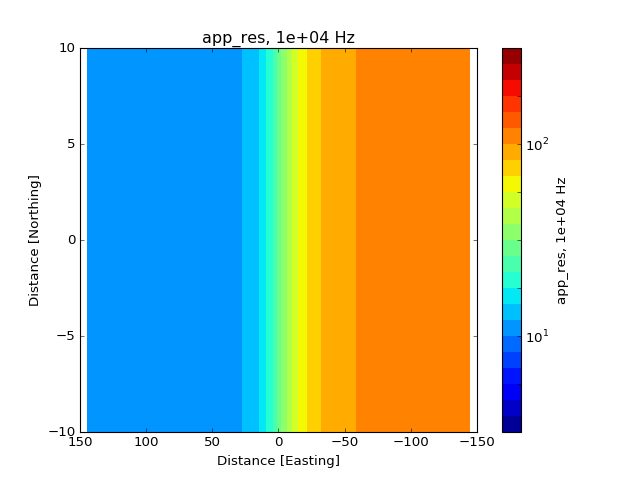

In [5]:
cont_kwargs={'levels':np.logspace(0.5,2.5,25),'norm':colors.LogNorm()}
component = 'app_res'
freq = 1e4
mtData.map_iso_frequency(freq, 'Z', 'yx', component=component,ax=None, plot_error=False, **cont_kwargs)
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))


<IPython.core.display.Javascript object>


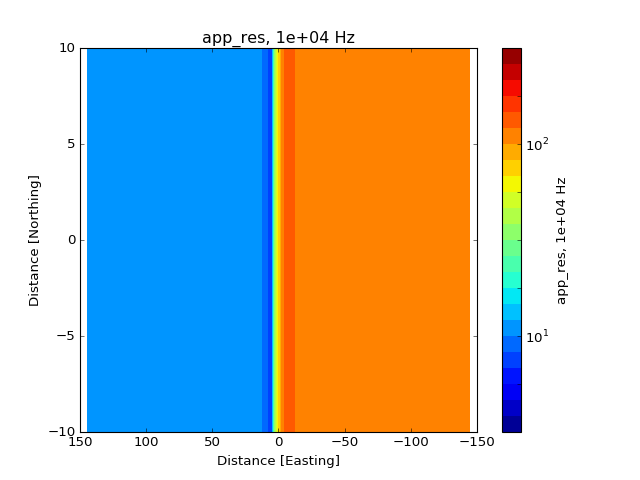

In [6]:
# cont_kwargs={'levels':np.linspace(600,1400,17)}#,'norm':colors.LogNorm()}
component = 'app_res'
freq = 1e4
mtData.map_iso_frequency(freq, 'Z', 'xy', component=component,ax=None, plot_error=False, **cont_kwargs)
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))


<IPython.core.display.Javascript object>


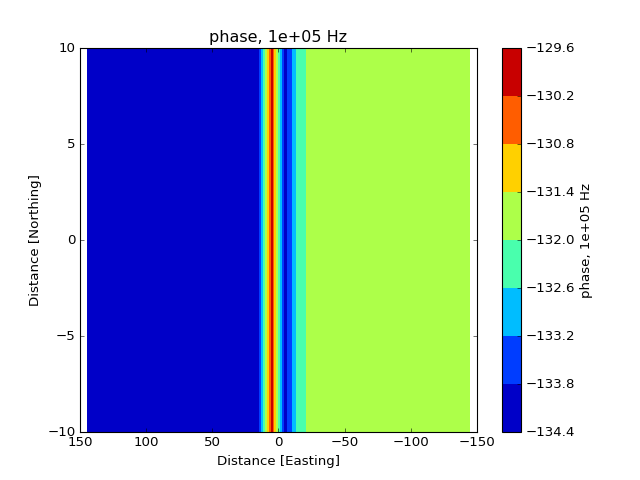

In [7]:
component = 'phase'
freq = 1e5
mtData.map_iso_frequency(freq, 'Z', 'xy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

<IPython.core.display.Javascript object>


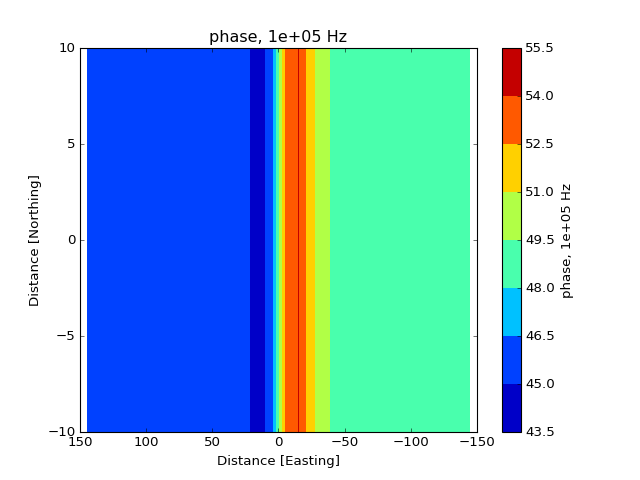

In [8]:
component = 'phase'
freq = 1e5
mtData.map_iso_frequency(freq, 'Z', 'yx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

<IPython.core.display.Javascript object>


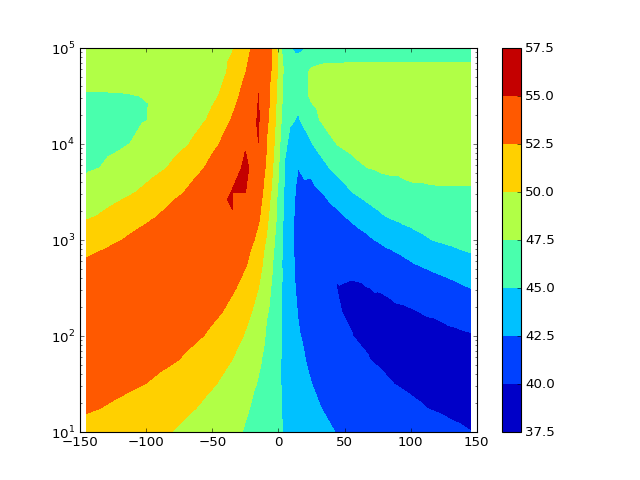

In [10]:
#cont_args = {'levels':np.logspace(1.5,2.2,8*4+1)}#,'norm':colors.LogNorm()}
cont_args = {'levels':np.linspace(50.,150.,11)}#,'norm':colors.LogNorm()}
fig, ax, cont = mtData.section_plot({'y':0.},'Z','yx','phase',ax=None, plot_error=False)#, **cont_args)
ax.set_yscale('log')
plt.colorbar(cont)

In [10]:
cont_args = {'levels':np.linspace(100.,1000.,10),'norm':colors.LogNorm()}


In [11]:
cont_args

{'levels': array([  50.,   60.,   70.,   80.,   90.,  100.,  110.,  120.,  130.,
         140.,  150.])}

In [12]:
np.logspace(0.2,2.2,41)

array([   1.58489319,    1.77827941,    1.99526231,    2.23872114,
          2.51188643,    2.81838293,    3.16227766,    3.54813389,
          3.98107171,    4.46683592,    5.01187234,    5.62341325,
          6.30957344,    7.07945784,    7.94328235,    8.91250938,
         10.        ,   11.22018454,   12.58925412,   14.12537545,
         15.84893192,   17.7827941 ,   19.95262315,   22.38721139,
         25.11886432,   28.18382931,   31.6227766 ,   35.48133892,
         39.81071706,   44.66835922,   50.11872336,   56.23413252,
         63.09573445,   70.79457844,   79.43282347,   89.12509381,
        100.        ,  112.20184543,  125.89254118,  141.25375446,
        158.48931925])

<IPython.core.display.Javascript object>


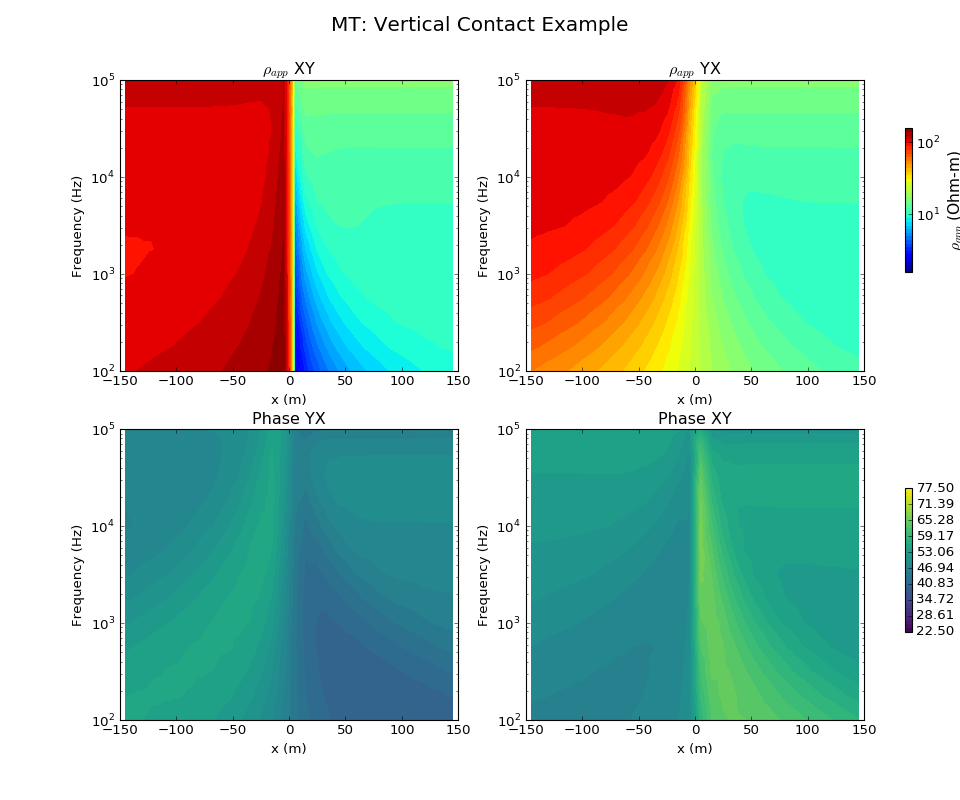

In [13]:
fig = plt.figure(figsize= (12,10))
ax0 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax1 = plt.subplot(224)

cont_args_app_res = {'levels':np.logspace(0.2,2.2,41),'norm':colors.LogNorm()}
cont_args_phasexy = {'levels':np.linspace(-157.5,-112.5,37),'cmap':'viridis'}#,'norm':colors.LogNorm()}
cont_args_phaseyx = {'levels':np.linspace(22.5,77.5,37),'cmap':'viridis'}#,'norm':colors.LogNorm()}


fig,ax0,cont_appresxy = mtData.section_plot({'y':0.},'Z','xy','app_res',ax=ax0, plot_error=False, **cont_args_app_res)
fig,ax1,cont_phasexy = mtData.section_plot({'y':0.},'Z','xy','phase',ax=ax1, plot_error=False, **cont_args_phasexy)
fig,ax2,cont_appresyx = mtData.section_plot({'y':0.},'Z','yx','app_res',ax=ax2, plot_error=False, **cont_args_app_res)
fig,ax3,cont_phaseyx = mtData.section_plot({'y':0.},'Z','yx','phase',ax=ax3, plot_error=False, **cont_args_phaseyx)
ax0.set_yscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax0.set_xlabel('x (m)')
ax0.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('Frequency (Hz)')
[ax.set_ylim(1e2,1e5) for ax in [ax0,ax1,ax2,ax3]]
ax0.set_title(r'$\rho_{app}$ XY')
ax2.set_title(r'$\rho_{app}$ YX')
ax1.set_title(r'Phase XY')
ax3.set_title(r'Phase YX')

cbar_ax = fig.add_axes([0.9, 0.5, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_appresxy, ax=cbar_ax,ticks=[1,10,100])#,format = formatter)
cb.set_label(r'$\rho_{app}$ (Ohm-m)',fontsize = 14.)

cbar_ax = fig.add_axes([0.9, 0.05, 0.05, 0.5])
cbar_ax.axis('off')
cb = plt.colorbar(cont_phaseyx, ax=cbar_ax)#,format = formatter)
cb.set_label(r'Phase',fontsize = 14.)
fig.suptitle('MT: Vertical Contact Example',fontsize =18.)

#plt.tight_layout()

<IPython.core.display.Javascript object>


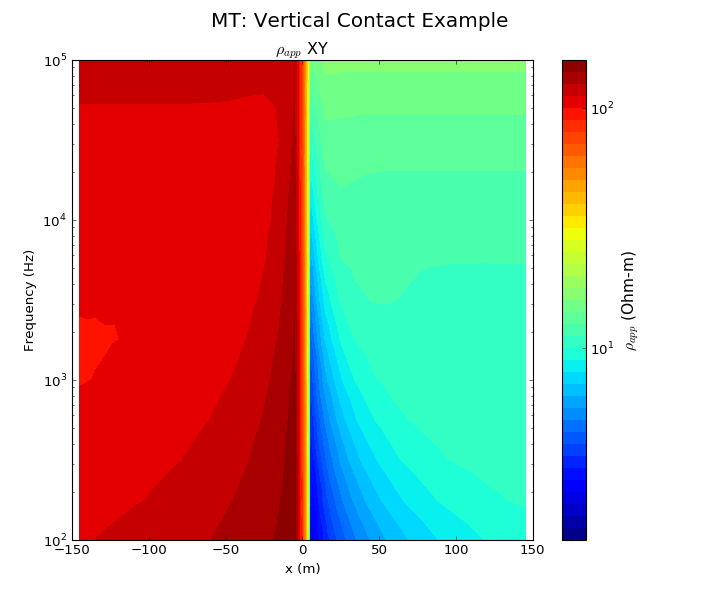

In [13]:
fig = plt.figure(figsize= (9,7.5))
ax0 = fig.add_axes([0.1,0.1,0.8,0.8])
# ax2 = plt.subplot(222)
# ax3 = plt.subplot(223)
# ax1 = plt.subplot(224)

cont_args_app_res = {'levels':np.logspace(0.2,2.2,41),'norm':colors.LogNorm()}
# cont_args_phasexy = {'levels':np.linspace(-157.5,-112.5,37),'cmap':'viridis'}#,'norm':colors.LogNorm()}
# cont_args_phaseyx = {'levels':np.linspace(22.5,77.5,37),'cmap':'viridis'}#,'norm':colors.LogNorm()}


fig,ax0,cont_appresxy = mtData.section_plot({'y':0.},'Z','xy','app_res',ax=ax0, plot_error=False, **cont_args_app_res)
# fig,ax1,cont_phasexy = mtData.section_plot({'y':0.},'Z','xy','phase',ax=ax1, plot_error=False, **cont_args_phasexy)
# fig,ax2,cont_appresyx = mtData.section_plot({'y':0.},'Z','yx','app_res',ax=ax2, plot_error=False, **cont_args_app_res)
# fig,ax3,cont_phaseyx = mtData.section_plot({'y':0.},'Z','yx','phase',ax=ax3, plot_error=False, **cont_args_phaseyx)
ax0.set_yscale('log')
# ax1.set_yscale('log')
# ax2.set_yscale('log')
# ax3.set_yscale('log')

ax0.set_xlabel('x (m)')
ax0.set_ylabel('Frequency (Hz)')
# ax1.set_xlabel('x (m)')
# ax1.set_ylabel('Frequency (Hz)')
# ax2.set_xlabel('x (m)')
# ax2.set_ylabel('Frequency (Hz)')
# ax3.set_xlabel('x (m)')
# ax3.set_ylabel('Frequency (Hz)')
ax0.set_ylim(1e2,1e5)
ax0.set_title(r'$\rho_{app}$ XY')
# ax2.set_title(r'$\rho_{app}$ YX')
# ax1.set_title(r'Phase XY')
# ax3.set_title(r'Phase YX')

# cbar_ax = fig.add_axes([0.75, 0.05, 0.1, 0.9])
# cbar_ax.axis('off')
cb = plt.colorbar(cont_appresxy, ticks=[1,10,100])#,format = formatter)
cb.set_label(r'$\rho_{app}$ (Ohm-m)',fontsize = 14.)

# cbar_ax = fig.add_axes([0.9, 0.05, 0.05, 0.5])
# cbar_ax.axis('off')
# cb = plt.colorbar(cont_phaseyx, ax=cbar_ax)#,format = formatter)
# cb.set_label(r'Phase',fontsize = 14.)
fig.suptitle('MT: Vertical Contact Example',fontsize =18.)
fig.savefig('AppResXY.png')

<IPython.core.display.Javascript object>


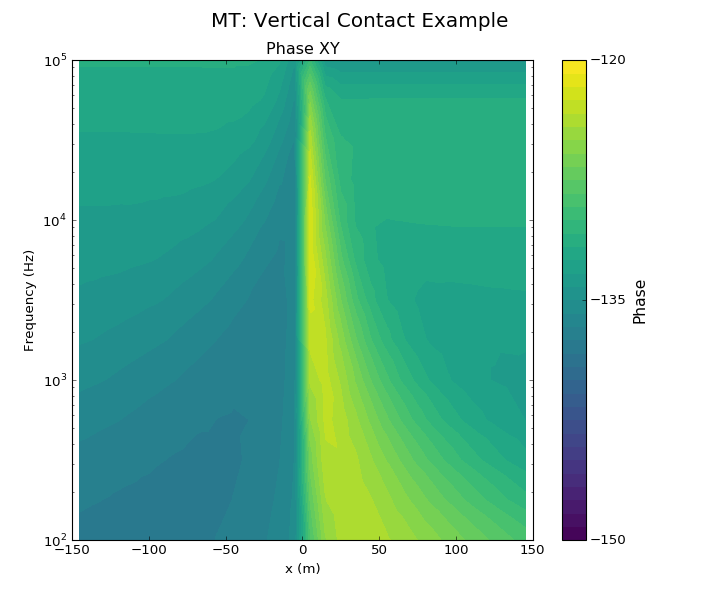

In [14]:
fig = plt.figure(figsize= (9,7.5))
ax0 = fig.add_axes([0.1,0.1,0.8,0.8])


cont_args_phasexy = {'levels':np.linspace(-150,-120,37),'cmap':'viridis'}#,'norm':colors.LogNorm()}

fig,ax0,cont_phasexy = mtData.section_plot({'y':0.},'Z','xy','phase',ax=ax0, plot_error=False, **cont_args_phasexy)
ax0.set_yscale('log')

ax0.set_xlabel('x (m)')
ax0.set_ylabel('Frequency (Hz)')

ax0.set_ylim(1e2,1e5)

ax0.set_title(r'Phase XY')

cb = plt.colorbar(cont_phasexy, ticks=[-150,-135,-120])#,format = formatter)
cb.set_label(r'Phase',fontsize = 14.)

fig.suptitle('MT: Vertical Contact Example',fontsize =18.)
fig.savefig('PhaseXY.png')

<IPython.core.display.Javascript object>


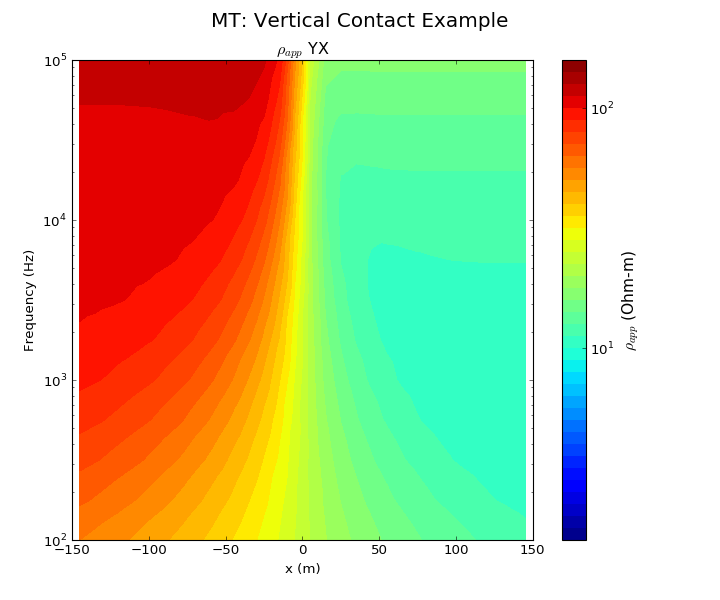

In [14]:
fig = plt.figure(figsize= (9,7.5))
ax0 = fig.add_axes([0.1,0.1,0.8,0.8])

cont_args_app_res = {'levels':np.logspace(0.2,2.2,41),'norm':colors.LogNorm()}



fig,ax,cont_appresyx = mtData.section_plot({'y':0.},'Z','yx','app_res',ax=ax0, plot_error=False, **cont_args_app_res)
ax0.set_yscale('log')
ax0.set_xlabel('x (m)')
ax0.set_ylabel('Frequency (Hz)')

ax0.set_ylim(1e2,1e5)
ax0.set_title(r'$\rho_{app}$ YX')

cb = plt.colorbar(cont_appresyx, ticks=[1,10,100])
cb.set_label(r'$\rho_{app}$ (Ohm-m)',fontsize = 14.)

fig.suptitle('MT: Vertical Contact Example',fontsize =18.)
fig.savefig('AppResYX.png')

<IPython.core.display.Javascript object>


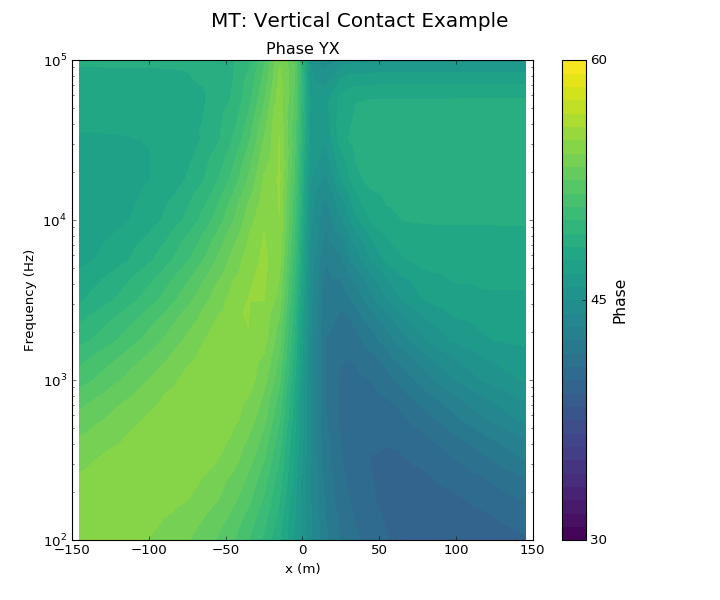

In [15]:
fig = plt.figure(figsize= (9,7.5))
ax0 = fig.add_axes([0.1,0.1,0.8,0.8])


cont_args_phaseyx = {'levels':np.linspace(30,60,37),'cmap':'viridis'}#,'norm':colors.LogNorm()}


fig,ax0,cont_phaseyx = mtData.section_plot({'y':0.},'Z','yx','phase',ax=ax0, plot_error=False, **cont_args_phaseyx)
ax0.set_yscale('log')
# ax1.set_yscale('log')
# ax2.set_yscale('log')
# ax3.set_yscale('log')

ax0.set_xlabel('x (m)')
ax0.set_ylabel('Frequency (Hz)')
ax0.set_ylim(1e2,1e5)
ax0.set_title(r'Phase YX')

cb = plt.colorbar(cont_phaseyx, ticks=[30,45,60])#,format = formatter)
cb.set_label(r'Phase',fontsize = 14.)
fig.suptitle('MT: Vertical Contact Example',fontsize =18.)
fig.savefig('PhaseYX.png')

<IPython.core.display.Javascript object>


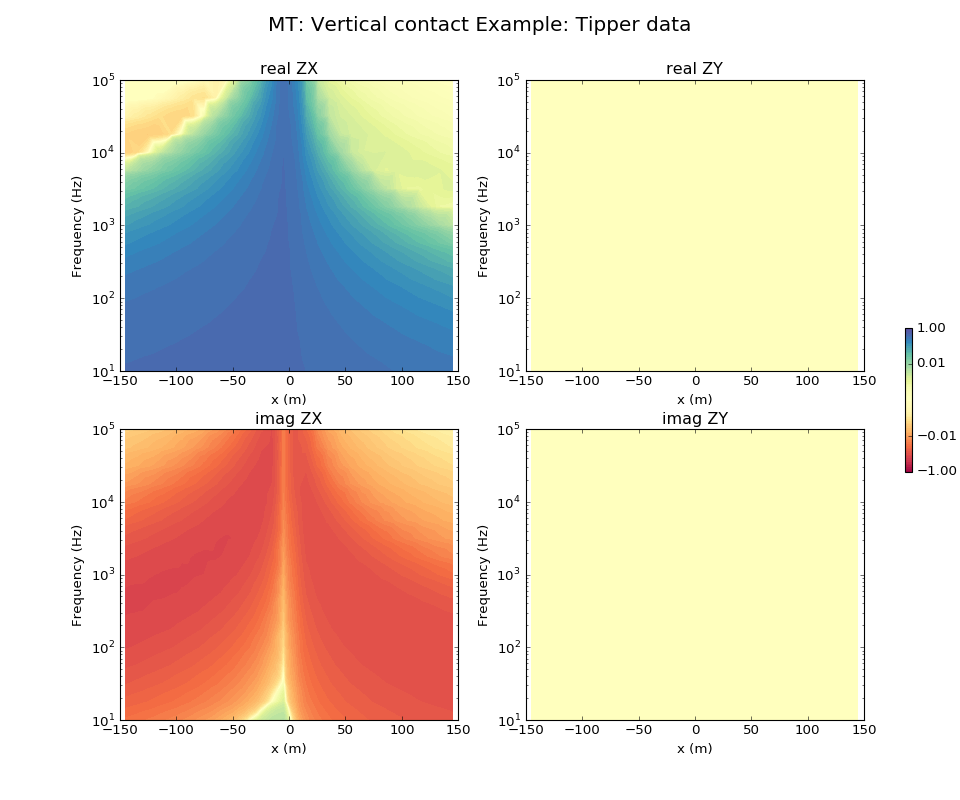

In [15]:
fig = plt.figure(figsize= (12,10))
ax0 = plt.subplot(221)
ax1 = plt.subplot(223)
ax2 = plt.subplot(222)
ax3 = plt.subplot(224)

log_levels = np.logspace(-4,0,41)
sym_log_levels = np.concatenate((-log_levels[::-1],log_levels))
cont_args_tip = {'levels':sym_log_levels,'cmap':'Spectral','norm':colors.SymLogNorm(1e-3,linscale=1)}
cont_args_tip_imag = {'levels':np.linspace(-145.,-115.,21),'cmap':'viridis','norm':colors.LogNorm()}
cont_args_phaseyx = {'levels':np.linspace(35.,55.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}


fig,ax0,cont_trzx = mtData.section_plot({'y':0.},'T','zx','real',ax=ax0, plot_error=False, **cont_args_tip)
fig,ax1,cont_tizx = mtData.section_plot({'y':0.},'T','zx','imag',ax=ax1, plot_error=False, **cont_args_tip)
fig,ax2,cont_trzy = mtData.section_plot({'y':0.},'T','zy','real',ax=ax2, plot_error=False, **cont_args_tip)
fig,ax3,cont_tizy = mtData.section_plot({'y':0.},'T','zy','imag',ax=ax3, plot_error=False, **cont_args_tip)
ax0.set_yscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax0.set_xlabel('x (m)')
ax0.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('x (m)')
ax2.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('Frequency (Hz)')

ax0.set_title(r'real ZX')
ax1.set_title(r'imag ZX')
ax2.set_title(r'real ZY')
ax3.set_title(r'imag ZY')

cbar_ax = fig.add_axes([0.9, 0.05, 0.05, 0.9])
cbar_ax.axis('off')
cb = plt.colorbar(cont_trzx, ax=cbar_ax, ticks=[-1,-1e-2,1e-2,1])#,format = formatter)
# cb.set_label(r'Tipper',fontsize = 14.)

#cbar_ax = fig.add_axes([0.9, 0.05, 0.05, 0.5])
#cbar_ax.axis('off')
#cb = plt.colorbar(cont_phaseyx, ax=cbar_ax)#,format = formatter)
#cb.set_label(r'Phase',fontsize = 14.)
fig.suptitle('MT: Vertical contact Example: Tipper data',fontsize =18.)

#plt.tight_layout()

In [16]:
# Make a TM figure of single frequency
# Get the section data
freqyx, loc, yx_res = NSEM.Utils.plotUtils._get_section_data(mtData,{'y':0.},'Z','yx','app_res')
freqyx, loc, yx_phs = NSEM.Utils.plotUtils._get_section_data(mtData,{'y':0.},'Z','yx','phase')
freqxy, loc, xy_res = NSEM.Utils.plotUtils._get_section_data(mtData,{'y':0.},'Z','xy','app_res')
freqxy, loc, xy_phs = NSEM.Utils.plotUtils._get_section_data(mtData,{'y':0.},'Z','xy','phase')

In [47]:
mesh = dill.load(open('mesh_quartSpace.pkl','r'))
sigma = np.load('sigma_quartSpace.npy')
sigma1d = mesh.r(sigma,'CC','CC','M')[0,0,:]
## Setup the problem object
problem = NSEM.Problem3D_ePrimSec(mesh, sigmaMap=simpeg.Maps.IdentityMap(), sigmaPrimary = sigma1d)
problem.verbose = True

problem.Solver = PardisoSolver
problem.pair(mtData.survey)

In [18]:
# Find the fields at the surface
src = mtData.survey.getSrcByFreq(1000.)[0]
rx = src.rxList[2]

In [48]:
ind = rx.locs[:,1] == 0
locs_rx = rx.locs[ind,0]
ex_px = rx._ex_px[ind]
ey_px = rx._ey_px[ind]
ex_py = rx._ex_py[ind]
ey_py = rx._ey_py[ind]
hx_px = rx._hx_px[ind]
hy_px = rx._hy_px[ind]
hx_py = rx._hx_py[ind]
hy_py = rx._hy_py[ind]

In [49]:
locs_rx

array([-145., -135., -125., -115., -105.,  -95.,  -85.,  -75.,  -65.,
        -55.,  -45.,  -35.,  -25.,  -15.,   -5.,    5.,   15.,   25.,
         35.,   45.,   55.,   65.,   75.,   85.,   95.,  105.,  115.,
        125.,  135.,  145.])

In [58]:
ey_py

array([[-0.10428117+0.06556648j],
       [-0.10353997+0.06556114j],
       [-0.10279074+0.06556223j],
       [-0.10203336+0.06557002j],
       [-0.10126773+0.06558477j],
       [-0.10049376+0.06560675j],
       [-0.09971132+0.06563628j],
       [-0.09892032+0.06567366j],
       [-0.09812066+0.06571924j],
       [-0.09731221+0.06577338j],
       [-0.09649488+0.06583649j],
       [-0.09566856+0.06590899j],
       [-0.09483314+0.06599137j],
       [-0.09398852+0.06608415j],
       [-0.09313458+0.06618798j],
       [-0.09227633+0.06631024j],
       [-0.09142554+0.06643571j],
       [-0.09058886+0.06654267j],
       [-0.08976631+0.06663214j],
       [-0.08895789+0.06670503j],
       [-0.08816355+0.06676217j],
       [-0.08738325+0.06680432j],
       [-0.08661692+0.0668322j ],
       [-0.08586446+0.0668465j ],
       [-0.08512580+0.06684785j],
       [-0.08440083+0.06683687j],
       [-0.08368944+0.06681416j],
       [-0.08299152+0.06678026j],
       [-0.08230694+0.06673573j],
       [-0.081

<IPython.core.display.Javascript object>


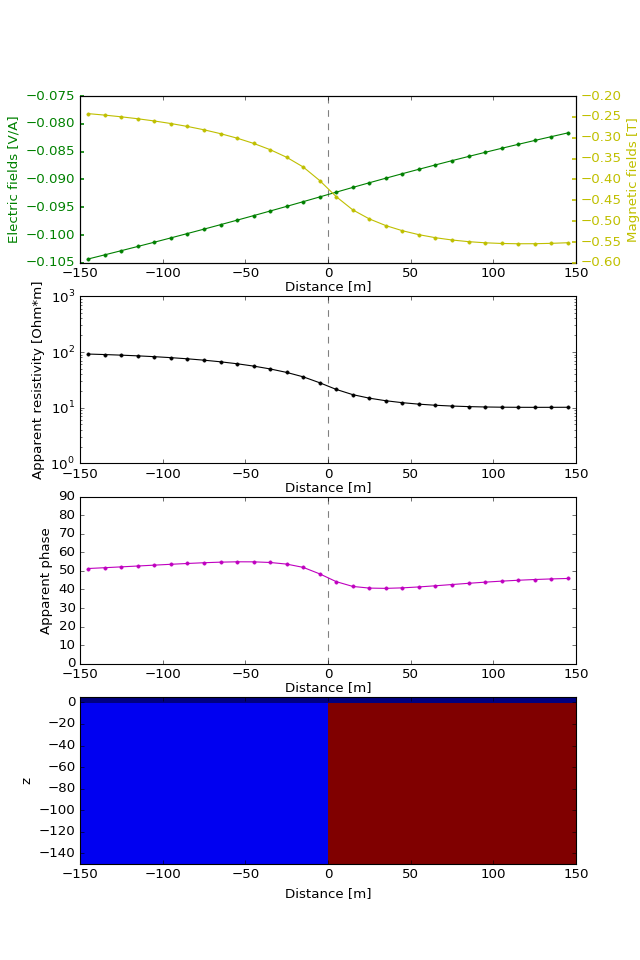

In [106]:
%matplotlib notebook
fig = plt.figure(figsize=[8,12])
ax0 = fig.add_subplot(411)
# ax0.plot(locs_rx,ey_px.real,'g+-',locs_rx,ey_py.real,'g.-')[0]
ax0.plot(locs_rx,ey_py.real,'g.-')[0]

# ax0.set_yscale('log')
ax0.set_xlabel('Distance [m]')
ax0.xaxis.labelpad = 0 
ax0.set_ylabel('Electric fields [V/A]')
ax0.vlines(0,ax0.get_ylim()[0], -0.0751,colors='gray',linestyles='--')
# ax0.set_ylim(1,1000)
ax0h = ax0.twinx()
# ax0h.plot(locs_rx,hx_px.real,'y+-',locs_rx,hx_py.real,'y.-')[0]
ax0h.plot(locs_rx,hx_py.real,'y.-')[0]


# ax0.set_yscale('log')
ax0h.set_ylabel('Magnetic fields [T]')
ax0.yaxis.label.set_color('g')
ax0h.yaxis.label.set_color('y')

tkw = dict(size=4, width=1.5)
ax0.tick_params(axis='y', colors='g', **tkw)
ax0h.tick_params(axis='y', colors='y', **tkw)


ax1 = fig.add_subplot(412)
ax1.plot(loc[freqyx == 1e3, 0],yx_res[freqyx == 1e3],'k.-')[0]
ax1.set_yscale('log')
ax1.set_xlabel('Distance [m]')
ax1.xaxis.labelpad = 0 
ax1.set_ylabel('Apparent resistivity [Ohm*m]')
ax1.set_ylim(1,1000)
ax1.vlines(0,1,1000,colors='gray',linestyles='--')

ax2 = fig.add_subplot(413)
ax2.plot(loc[freqyx == 1e3, 0],yx_phs[freqyx == 1e3],'m.-')[0]
ax2.set_xlabel('Distance [m]')
ax2.xaxis.labelpad = 0 
ax2.set_ylabel('Apparent phase')
ax2.set_ylim(0,90)
ax2.vlines(0,0,90,colors='gray',linestyles='--')

ax3 = fig.add_subplot(414)
mesh.plotSlice(sigma, normal='Y',ax=ax3)
ax3.set_xlabel('Distance [m]')
ax3.set_xlim(-150,150)
ax3.set_ylim(-150,5)
ax3.set_title('')

fig.savefig('quarterSpace_TEyxMod_resphsspace.png')

<IPython.core.display.Javascript object>


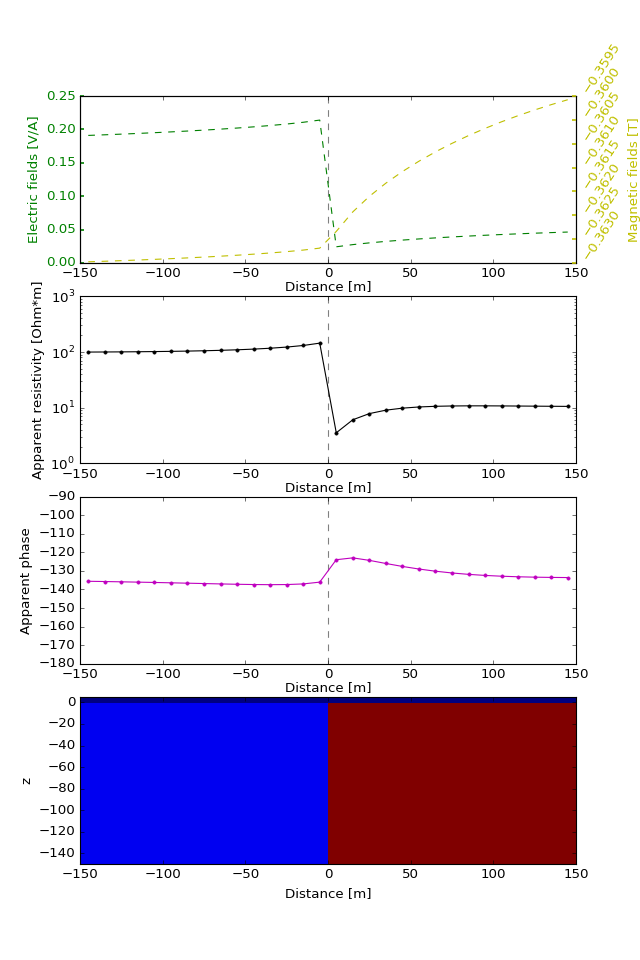

In [107]:
%matplotlib notebook
fig = plt.figure(figsize=[8,12])
ax0 = fig.add_subplot(411)
# ax0.plot(locs_rx,ex_px.real,'g--',locs_rx,ex_py.real,'g.-')[0]
ax0.plot(locs_rx,ex_px,'g--')[0]

# ax0.set_yscale('log')
ax0.set_xlabel('Distance [m]')
ax0.xaxis.labelpad = 0 
ax0.set_ylabel('Electric fields [V/A]')
ax0.vlines(0,ax0.get_ylim()[0], ax0.get_ylim()[1],colors='gray',linestyles='--')
# ax0.set_ylim(1,1000)
ax0h = ax0.twinx()
# ax0h.plot(locs_rx,hy_px.real,'y--',locs_rx,hy_py.real,'y.-')[0]
ax0h.plot(locs_rx,hy_px,'y--')[0]
# ax0.set_yscale('log')
ax0h.set_ylabel('Magnetic fields [T]')
ax0.yaxis.label.set_color('g')
ax0h.yaxis.label.set_color('y')

tkw = dict(size=4, width=1.5)
ax0.tick_params(axis='y', colors='g', **tkw)
ax0h.tick_params(axis='y', colors='y', **tkw)
# Sort out the labels
# ax0ht = ax0h.get_yticks()
# ax0htl = ax0h.get_yticklabels()
plt.setp( ax0h.yaxis.get_majorticklabels(), rotation=57, verticalalignment='bottom' )


ax1 = fig.add_subplot(412)
ax1.plot(loc[freqxy == 1e3, 0],xy_res[freqxy == 1e3],'k.-')[0]
ax1.set_yscale('log')
ax1.set_xlabel('Distance [m]')
ax1.xaxis.labelpad = 0 
ax1.set_ylabel('Apparent resistivity [Ohm*m]')
ax1.vlines(0,1,1000,colors='gray',linestyles='--')

ax2 = fig.add_subplot(413)
ax2.plot(loc[freqxy == 1e3, 0],xy_phs[freqxy == 1e3],'m.-')[0]
ax2.set_xlabel('Distance [m]')
ax2.xaxis.labelpad = 0 
ax2.set_ylabel('Apparent phase')
ax2.set_ylim(-180,-90)
ax2.vlines(0,-180,-90,colors='gray',linestyles='--')

ax3 = fig.add_subplot(414)
mesh.plotSlice(sigma, normal='Y',ax=ax3)
ax3.set_title('')
ax3.set_xlim(-150,150)
ax3.set_ylim(-150,5)
ax3.set_xlabel('Distance [m]')

fig.savefig('quarterSpace_TMxyMod_resphsspace.png')

<IPython.core.display.Javascript object>


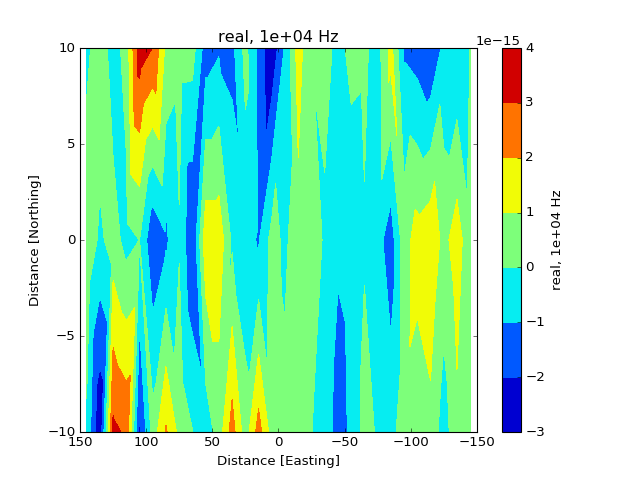

In [21]:
component = 'real'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

<IPython.core.display.Javascript object>


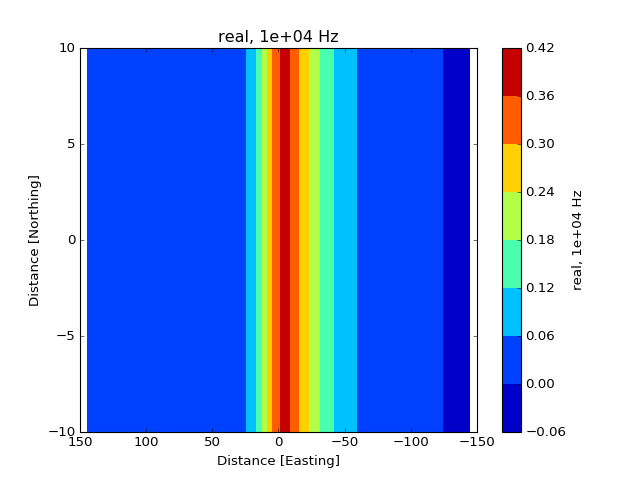

In [22]:
component = 'real'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

<IPython.core.display.Javascript object>


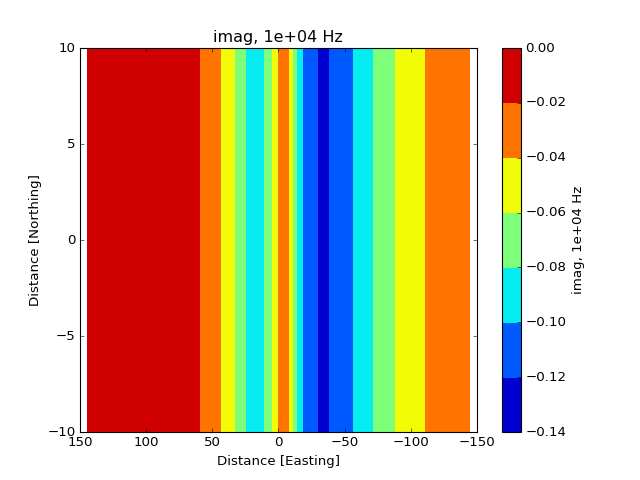

In [23]:
component = 'imag'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

<IPython.core.display.Javascript object>


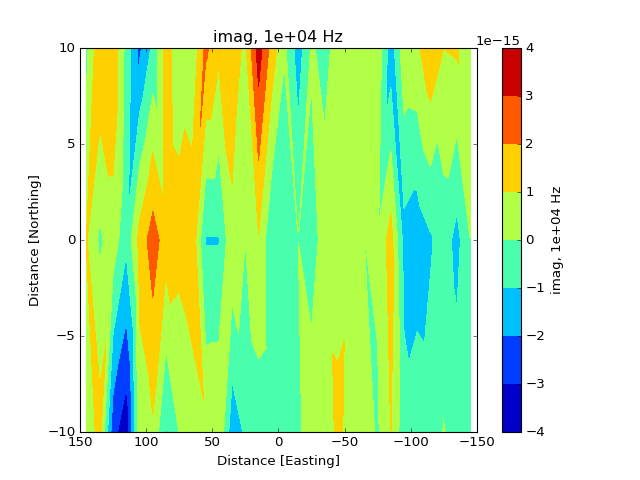

In [24]:
component = 'imag'
freq = 1e4
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

<IPython.core.display.Javascript object>


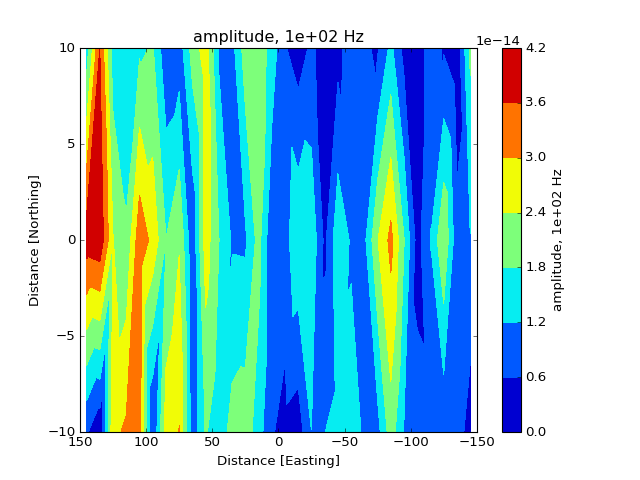

In [25]:
component = 'amplitude'
freq = 1e2
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

<IPython.core.display.Javascript object>


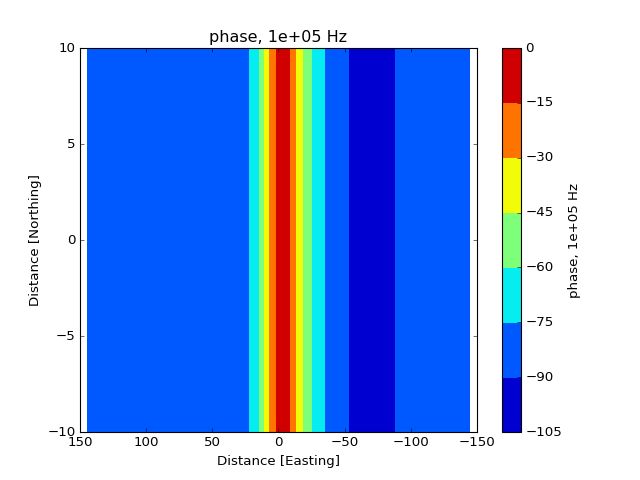

In [26]:
component = 'phase'
freq = 1e5
mtData.map_iso_frequency(freq, 'T', 'zx', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

<IPython.core.display.Javascript object>


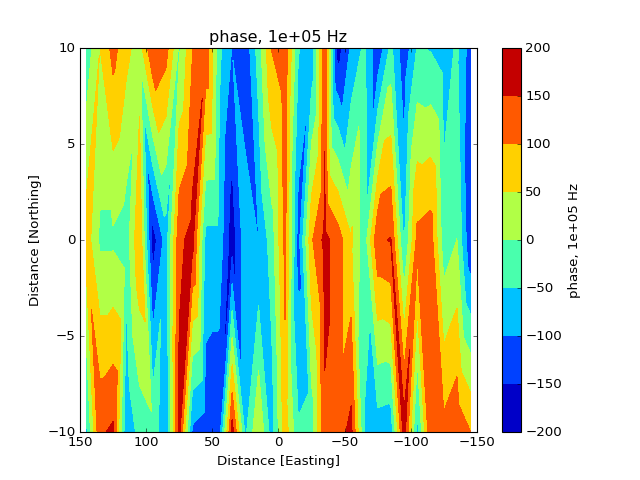

In [27]:
component = 'phase'
freq = 1e5
mtData.map_iso_frequency(freq, 'T', 'zy', component=component)#, plot_kwargs={'level':np.arange(-180,-90,2)})
plt.gca().set_title(('%s, %.g Hz')%(component,freq))
cb = plt.colorbar()
cb.set_label(('%s, %.g Hz')%(component,freq))

/home/gudni/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


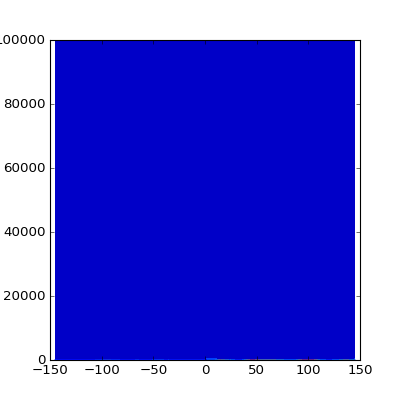

In [28]:
fig = plt.figure(figsize= (5,5))
ax0 = plt.subplot(111)


cont_args_app_res = {'levels':np.linspace(50.,150.,11)}#,'norm':colors.LogNorm()}
cont_args_phasexy = {'levels':np.linspace(-145.,-115.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}
cont_args_phaseyx = {'levels':np.linspace(35.,55.,21),'cmap':'viridis'}#,'norm':colors.LogNorm()}


fig,ax0,cont_appresxy = mtData.section_plot({'y':0.},'T','zy','amplitude',ax=ax0, plot_error=False)#, **cont_args_app_res)